Data Dictionary

Ticket #: Ticket number assigned to each complaint
Customer Complaint: Description of complaint
Date: Date of complaint
Time: Time of complaint
Received Via: Mode of communication of the complaint
City: Customer city
State: Customer state
Zipcode: Customer zip
Status: Status of complaint
Filing on behalf of someone
Analysis Task

Import data into Python environment.

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [5]:
c = pd.read_csv('Comcast_telecom_complaints_data.csv')
c = pd.DataFrame(c)
c.head(n=1)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No


Provide the trend chart for the number of complaints at monthly and daily granularity levels.

In [26]:
num_complaints_daily = c.groupby(by=["Date_month_year"], dropna=False).count()
daily_complaints = num_complaints_daily['Customer Complaint']
daily_complaints

Date_month_year
04-Apr-15    12
04-Aug-15    28
04-Dec-15    15
04-Feb-15    27
04-Jan-15    18
             ..
29-May-15    14
30-Apr-15    24
30-Jun-15    53
30-May-15     9
31-May-15    10
Name: Customer Complaint, Length: 91, dtype: int64

In [16]:
date_list = c['Date_month_year'].str.split('-', n=-1, expand=False)

months = []
for date in date_list:
    months.append(date[1])

c['months'] = months
c = c.reindex(columns=['Ticket #', 'Customer Complaint', 'Date', 'Date_month_year', 'months', 'Time', 'Received Via', 'City', 'State', 'Zip code', 'Status', 'Filing on Behalf of Someone'])
c.head()

,Ticket #,Customer Complaint,Date,Date_month_year,months,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,Apr,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,Aug,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,Apr,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,Jul,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,May,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [29]:
num_complaints_monthly = c.groupby(by=["months"], dropna=False).count()
monthly_complaints = num_complaints_monthly['Customer Complaint']
monthly_complaints

months
Apr     375
Aug      67
Dec      65
Feb      59
Jan      55
Jul      49
Jun    1046
Mar      45
May     317
Nov      38
Oct      53
Sep      55
Name: Customer Complaint, dtype: int64

Provide a table with the frequency of complaint types.

In [195]:
pd.set_option('display.max_rows', 15)
fct = pd.DataFrame(c['Customer Complaint'].value_counts().reset_index())
freq_complaint_types = fct.rename(columns={'index':'complaint type', 'Customer Complaint':'count'})
freq_complaint_types

,complaint type,count
0,Comcast,83
1,Comcast Internet,18
2,Comcast Data Cap,17
3,comcast,13
4,Comcast Billing,11
...,...,...
1836,Improper Billing and non resolution of issues,1
1837,Deceptive trade,1
1838,intermittent internet,1
1839,Internet Speed on Wireless Connection,1


Which complaint types are maximum i.e., around internet, network issues, or across any other domains.

In [48]:
# The max complaint types are comcast internet and data caps. 
freq_complaint_types.head(n=3)

,complaint type,count
0,Comcast,83
1,Comcast Internet,18
2,Comcast Data Cap,17


Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [52]:
status = []
for index, row in c.iterrows():
    if row['Status'] == 'Open' or row['Status'] == 'Pending':
        status.append('Open')
    elif row['Status'] == 'Closed' or row['Status'] == 'Solved':
       status.append('Closed')

c['Status Value'] = status
c.head()

,Ticket #,Customer Complaint,Date,Date_month_year,months,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Status Value
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,Apr,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Closed
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,Aug,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Closed
2,242732,Speed and Service,18-04-15,18-Apr-15,Apr,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,Jul,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,Open
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,May,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,Closed


Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

- Which state has the maximum complaints
- Which state has the highest percentage of unresolved complaints

In [102]:
complaints_by_state = c.groupby(by=["State"], dropna=False).count()
cbs = complaints_by_state.reset_index()

total_num_complaints = []
for index, row in cbs.iterrows():
    total_num_complaints.append(row['Customer Complaint'])

cbs['Total Complaints'] = total_num_complaints
cbs.head()

,State,Ticket #,Customer Complaint,Date,Date_month_year,months,Time,Received Via,City,Zip code,Status,Filing on Behalf of Someone,Status Value,Total Complaints
0,Alabama,26,26,26,26,26,26,26,26,26,26,26,26,26
1,Arizona,20,20,20,20,20,20,20,20,20,20,20,20,20
2,Arkansas,6,6,6,6,6,6,6,6,6,6,6,6,6
3,California,220,220,220,220,220,220,220,220,220,220,220,220,220
4,Colorado,80,80,80,80,80,80,80,80,80,80,80,80,80


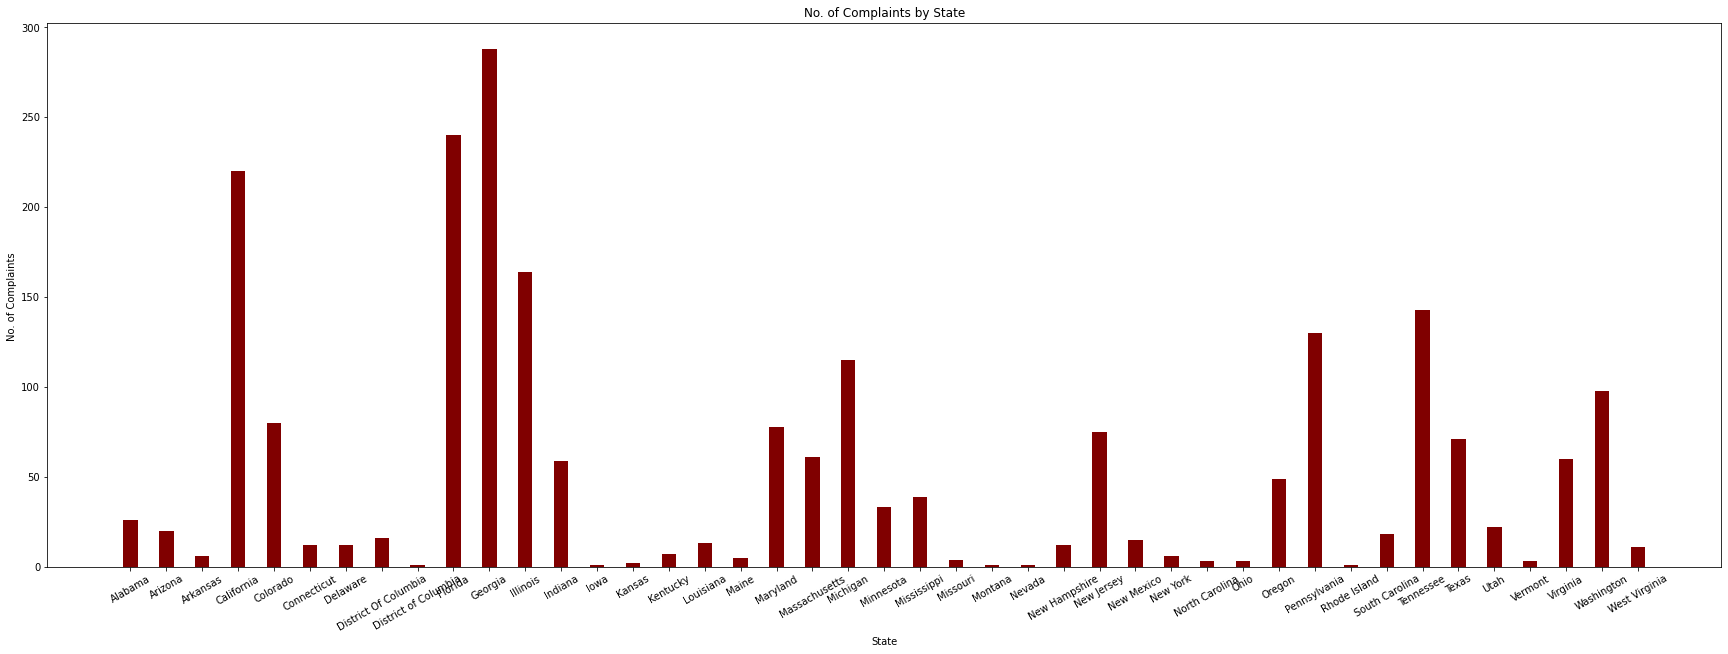

In [188]:
# Which state has the maximum complaints - Georgia

data = {}
for index, row in cbs.iterrows():
    data[row['State']] = row['Customer Complaint']
  
state = list(data.keys())
count = list(data.values())

fig = plt.figure(figsize = (30, 10))
plt.bar(state, count, color ='maroon',
        width = 0.4)
 
plt.xlabel("State")
plt.xticks(rotation=30)
plt.ylabel("No. of Complaints ")
plt.title("No. of Complaints by State")
plt.show()

In [190]:
# Which state has the highest percentage of unresolved complaints - Kansas
total_complaints = cbs[['State', 'Total Complaints']]
complaints_by_state_status = c.groupby(by=["State", 'Status Value'], dropna=False).count()
cbss = pd.DataFrame(complaints_by_state_status['Customer Complaint'])
cbss.head()
cbss = cbss.reset_index()

cbss = cbss.merge(total_complaints, on='State')

percentage = []
for index, row in cbss.iterrows():
    perc = round((row['Customer Complaint']/row['Total Complaints'])*100, 1)
    percentage.append(perc)

cbss['Percentage'] = percentage
open_complaints = cbss.loc[cbss['Status Value'] == 'Open']
    

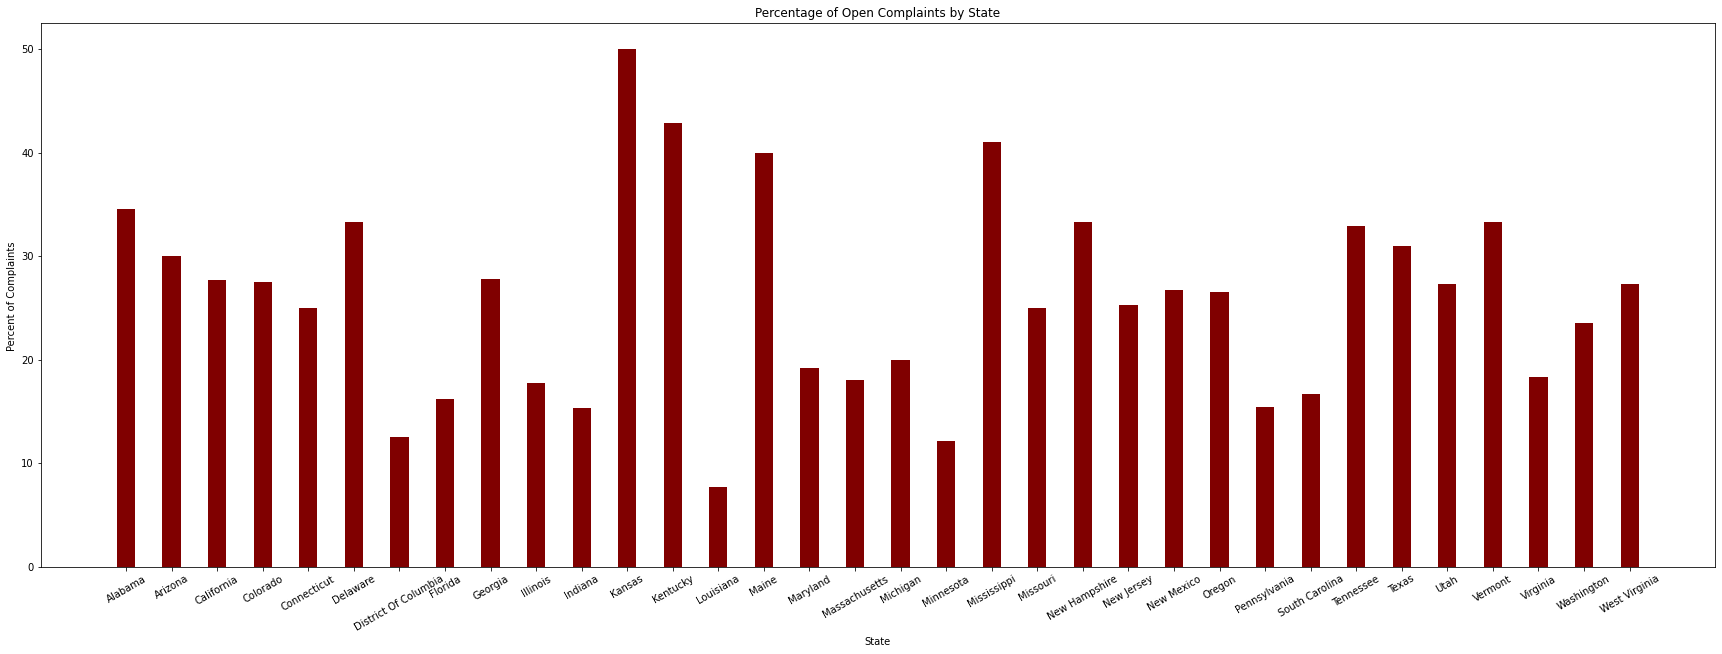

In [191]:
state = list(open_complaints['State'])
perc_closed = list(open_complaints['Percentage'])

fig = plt.figure(figsize = (30, 10))
plt.bar(state, perc_closed, color ='maroon',
        width = 0.4)
 
plt.xlabel("State")
plt.xticks(rotation=30)
plt.ylabel("Percent of Complaints ")
plt.title("Percentage of Open Complaints by State")
plt.show()

Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [183]:
perc_resolved = c.groupby(by=["Status Value"], dropna=False).count()
resolved = perc_resolved.drop(columns='Total Complaints')
resolved = resolved['Customer Complaint']
res = pd.DataFrame(resolved).reset_index()
res.columns = ['Status', 'Num Complaints']
total = res['Num Complaints'].sum()
res['Percent Total'] = round(((res['Num Complaints']/total)*100), 1)
res



,Status,Num Complaints,Percent Total
0,Closed,1707,76.8
1,Open,517,23.2
